In [ ]:
'''
Credit Risk Prediction Project
This study involves the comparison of various regression models (Linear Regression, Random Forest, Gradient Boosting) for credit risk prediction using a dataset.  
It includes steps such as data preprocessing, feature engineering, correlation analysis, and model evaluation.

Inspired by the following article: https://dergipark.org.tr/tr/pub/gazibtd/issue/69736/1039963
Dataset: https://www.kaggle.com/datasets/nikhil1e9/loan-default/data
'''


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Loan_default.csv')
df.head()
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
df_subset = df.head(1000)  # 255000 veri çok fazla ilk 1000 yeterli

In [7]:
print("\nEksik Değerler:\n", df_subset.isnull().sum())



Eksik Değerler:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [ ]:
df_subset.loc[:, 'TOS'] = df_subset['LoanTerm'] + 3
df_subset.loc[:, 'NetRisk'] = df_subset['LoanAmount'] - (df_subset['Income'] * 0.5)
df_subset.loc[:, 'AgencyAge'] = df_subset['Age'] - 5  # Default institution age difference
df_subset.loc[:, 'age_income'] = df_subset['Age'] * df_subset['Income']


<ipython-input-8-18e4a751987c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['TOS'] = df_subset['LoanTerm'] + 3
<ipython-input-8-18e4a751987c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['NetRisk'] = df_subset['LoanAmount'] - (df_subset['Income'] * 0.5)
<ipython-input-8-18e4a751987c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

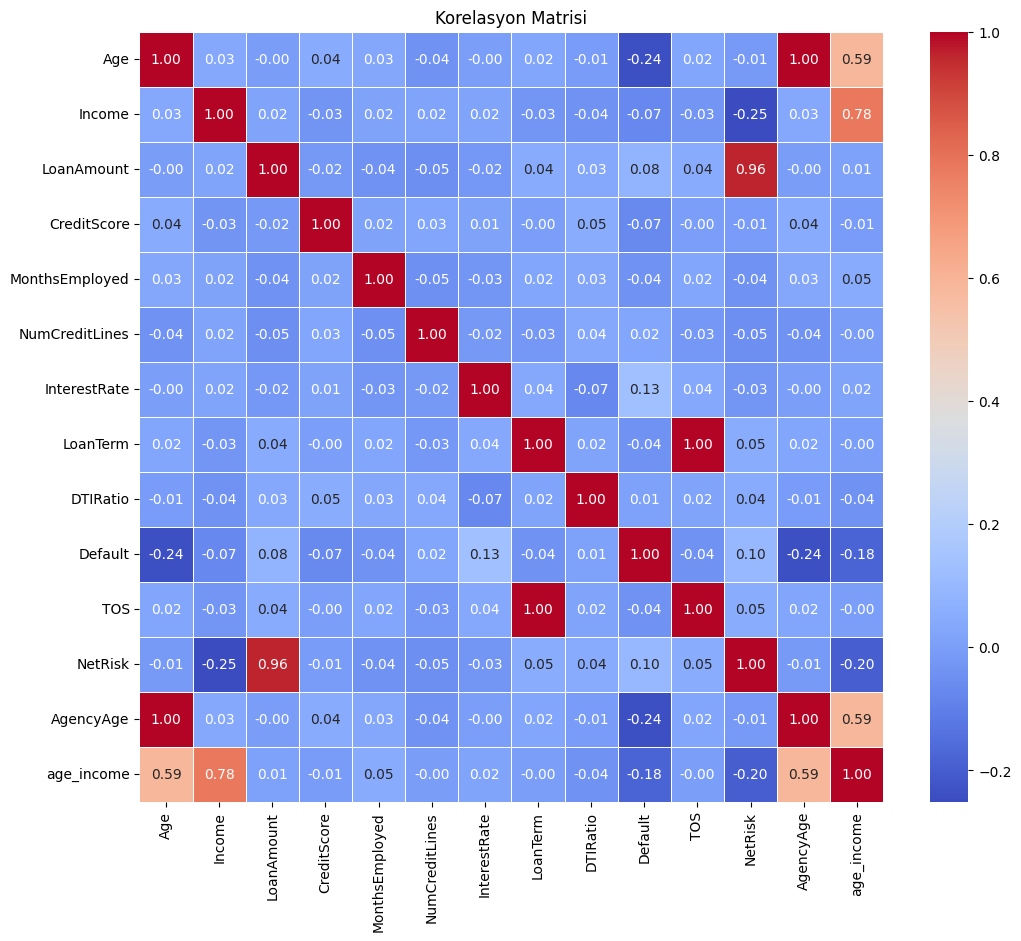

In [9]:
# Korelasyon Matrisi
plt.figure(figsize=(12, 10))
corr_matrix = df_subset.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


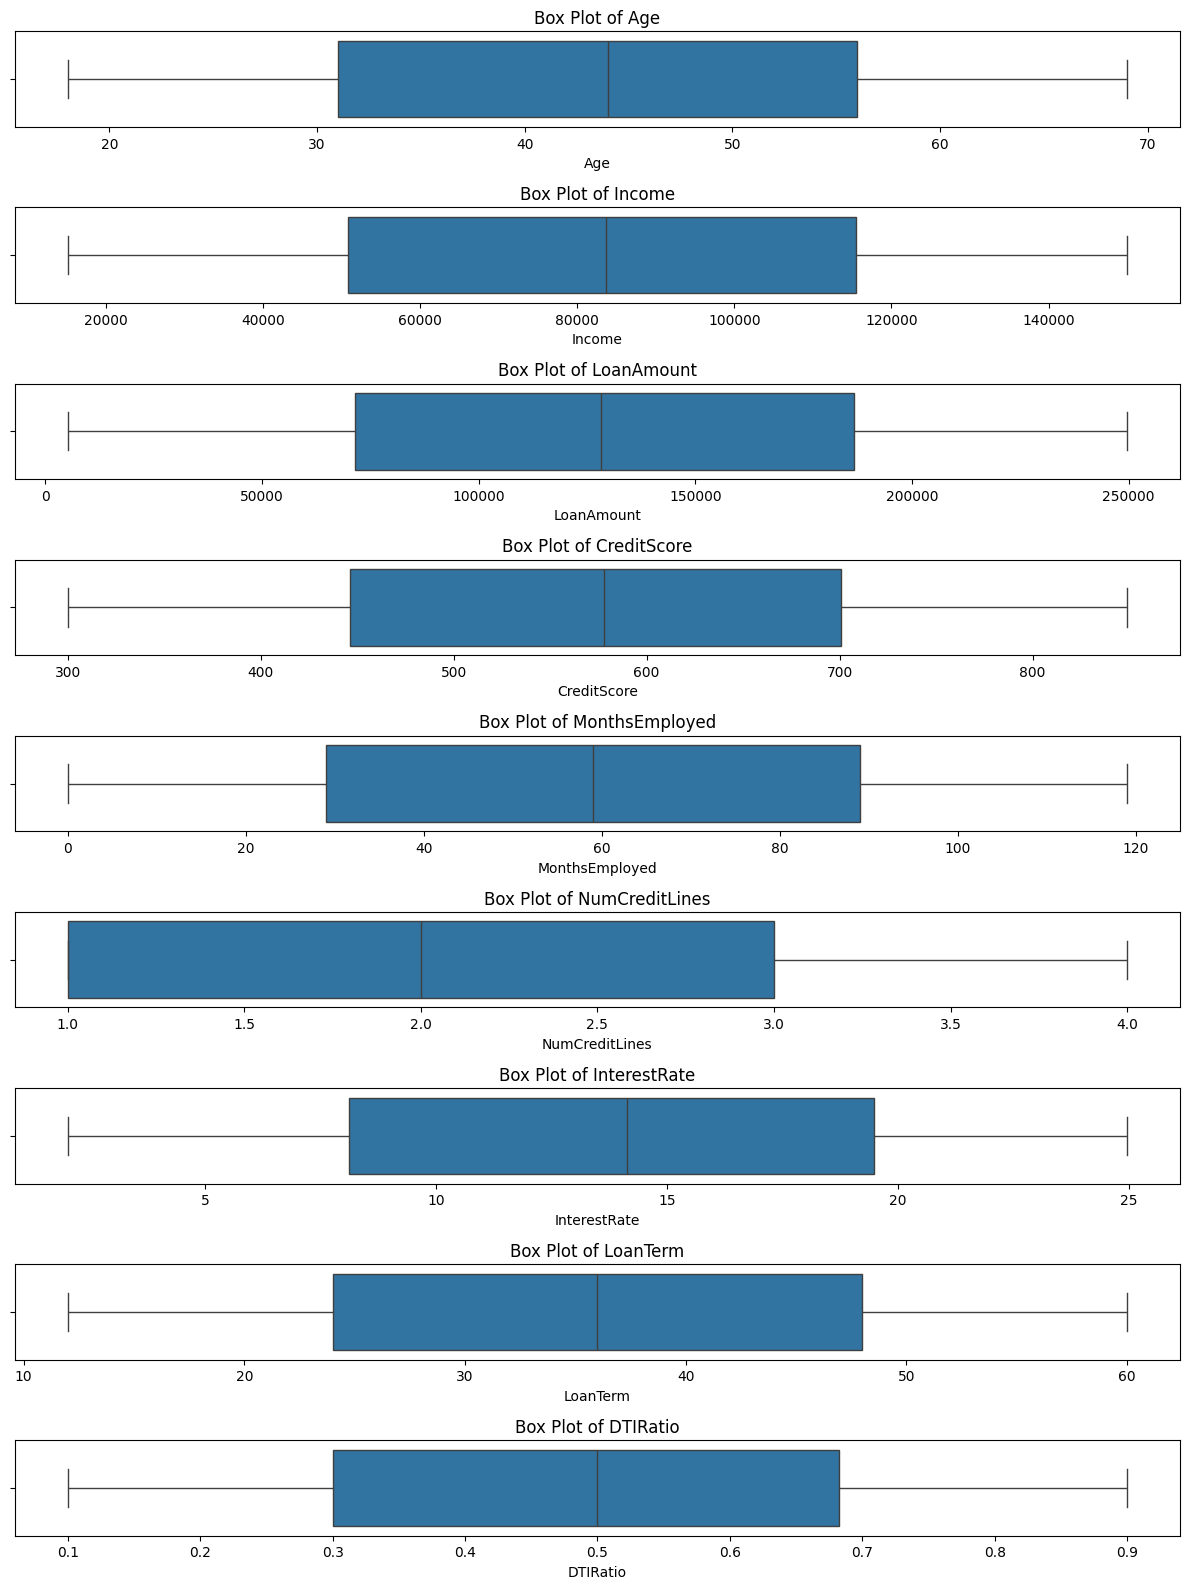

In [10]:
# outliers
numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                   'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                   'LoanTerm', 'DTIRatio']

plt.figure(figsize=(12, 16))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df_subset[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [11]:
target = 'LoanAmount'
X = df_subset.drop(columns=[target])
y = df_subset[target]
X = X.select_dtypes(include=[np.number])  # Sayısal verilerle sınırlama

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
#random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))


In [13]:
# linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


In [14]:
# gradient boosting regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))


In [15]:
print("\n=== MODEL KARŞILAŞTIRMALARI ===")
print("Linear Regression:\n  MAE:", mae_lr, "\n  RMSE:", rmse_lr)

print("\nRandom Forest:\n  MAE:", mae_rf, "\n  RMSE:", rmse_rf)

print("\nGradient Boosting:\n  MAE:", mae_gb, "\n  RMSE:", rmse_gb)



=== MODEL KARŞILAŞTIRMALARI ===
Linear Regression:
  MAE: 4.0708982851356266e-11 
  RMSE: 5.1912313194932474e-11

Random Forest:
  MAE: 2770.30625 
  RMSE: 3654.1985960446236

Gradient Boosting:
  MAE: 2525.7623381117464 
  RMSE: 3122.497034382762


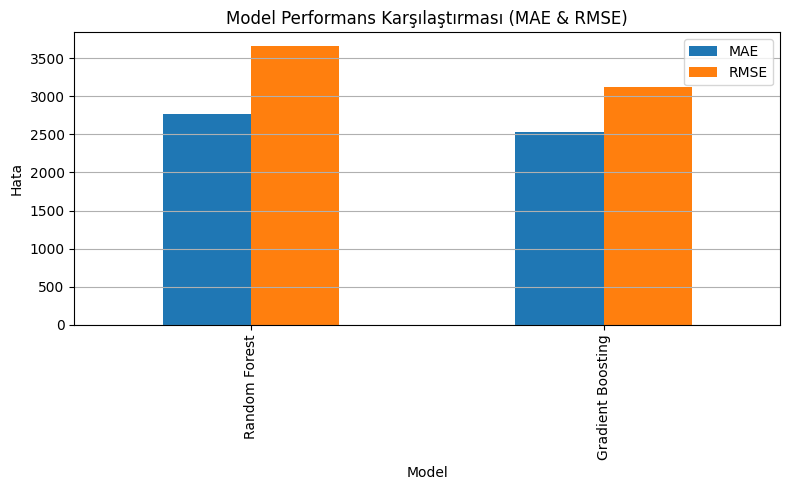

In [20]:
# MAE ve RMSE karşılaştırması için grafik
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'MAE': [mae_rf, mae_gb],
    'RMSE': [rmse_rf, rmse_gb]
})

metrics_df.set_index('Model').plot(kind='bar', figsize=(8, 5))
plt.title('Model Performans Karşılaştırması (MAE & RMSE)')
plt.ylabel('Hata')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


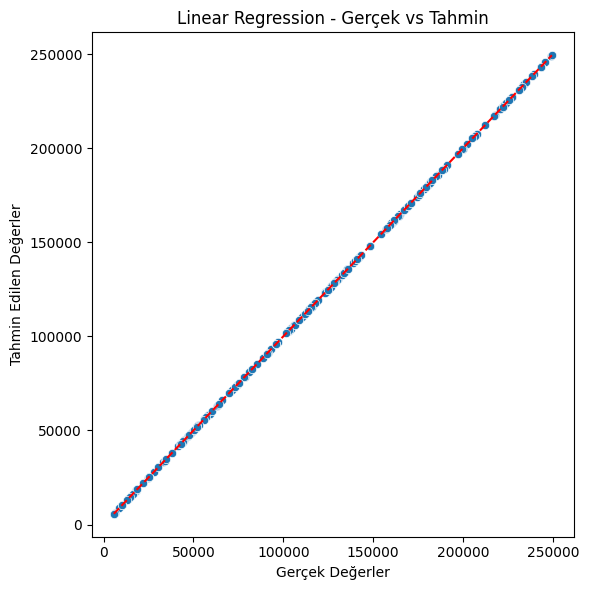

In [18]:
# Gerçek vs Tahmin karşılaştırması (linear reg)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Linear Regression - Gerçek vs Tahmin')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


In [21]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nR^2 Skorları:")
print("Linear Regression:", r2_lr)
print("Random Forest:", r2_rf)
print("Gradient Boosting:", r2_gb)



R^2 Skorları:
Linear Regression: 1.0
Random Forest: 0.9971440095329009
Gradient Boosting: 0.997914661651472
